### Bibliotecas

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from pymongo import MongoClient
from sshtunnel import SSHTunnelForwarder

import warnings
warnings.filterwarnings("ignore")

<p>Principais biliotecas e versoes utilizadas</p>

In [2]:
%reload_ext watermark
%watermark -a "Joao Paulo Ribeiro dos Santos" --iversions

Author: Joao Paulo Ribeiro dos Santos

pandas    : 1.2.4
matplotlib: 3.3.4
seaborn   : 0.11.1



### Importado Dados

In [3]:
MONGO_USER = "teste_dados_leitura"
MONGO_PASS = "o7c4Cc8NDeXYbAMH"
MONGO_DB = 'teste_dados'

client = MongoClient("mongodb+srv://" + MONGO_USER 
                     + ":" + MONGO_PASS
                     + "@teste-dados.mcqmr.mongodb.net/myFirstDatabase?retryWrites=true&w=majority")

database = client[MONGO_DB]

multas = database['multas_2020']

In [4]:
# Quantidade de collections
multas.count()

334

In [5]:
# Analisando um documento
multas.find_one({})

{'_id': ObjectId('60ab8f18ef5d383ce8403de0'),
 'escopo_autuacao': 'CMT - Capacidade Máxima de Tração',
 'mes': 'JANEIRO',
 'uf': 'Es',
 'amparo_legal': 'Lei 9503/97 Lei 10561/02 Res. CONTRAN nº 210/06, 211/06 e 258/07 e alterações Portaria DENATRAN 63/09 e 59/07 e alterações ',
 'descricao_infracao': 'Transitar com o veículo excedendo a CMT acima de 1000 kg',
 'quantidade_autos': '1'}

In [7]:
# Armazenando dados no datframe
df_multas = pd.DataFrame(list(multas.find()))

In [9]:
# Encerrando conexao
client.close()

In [8]:
# Dados
df_multas.head(5)

,_id,escopo_autuacao,mes,uf,amparo_legal,descricao_infracao,quantidade_autos
0,60ab8f18ef5d383ce8403de0,CMT - Capacidade Máxima de Tração,JANEIRO,Es,Lei 9503/97 Lei 10561/02 Res. CONTRAN nº 210/0...,Transitar com o veículo excedendo a CMT acima ...,1
1,60ab8f18ef5d383ce8403de1,CMT - Capacidade Máxima de Tração,JANEIRO,Mg,Lei 9503/97 Lei 10561/02 Res. CONTRAN nº 210/0...,Transitar com o veículo excedendo a CMT em até...,2
2,60ab8f18ef5d383ce8403de2,CMT - Capacidade Máxima de Tração,JANEIRO,MG,Lei 9503/97 Lei 10561/02 Res. CONTRAN nº 210/0...,Transitar com o veículo excedendo a CMT acima ...,3
3,60ab8f18ef5d383ce8403de3,CMT - Capacidade Máxima de Tração,JANeIRO,MS,Lei 9503/97 Lei 10561/02 Res. CONTRAN nº 210/0...,Transitar com o veículo excedendo a CMT acima ...,2
4,60ab8f18ef5d383ce8403de4,CMT - Capacidade Máxima de Tração,JANEIRO,RJ,Lei 9503/97 Lei 10561/02 Res. CONTRAN nº 210/0...,Transitar com o veículo excedendo a CMT entre ...,8


### Analisando os dados

In [10]:
# Informacao dos dados
df_multas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   _id                 334 non-null    object
 1   escopo_autuacao     334 non-null    object
 2   mes                 334 non-null    object
 3   uf                  334 non-null    object
 4   amparo_legal        334 non-null    object
 5   descricao_infracao  334 non-null    object
 6   quantidade_autos    334 non-null    object
dtypes: object(7)
memory usage: 18.4+ KB


In [11]:
# Total de valores nulos
df_multas.isnull().sum()

_id                   0
escopo_autuacao       0
mes                   0
uf                    0
amparo_legal          0
descricao_infracao    0
quantidade_autos      0
dtype: int64

In [124]:
# Tranformar todas as string para maiuscula
df_multas_treated = df_multas.apply(lambda x: x.astype(str).str.upper())

# Remover coluna ID
df_multas_treated = df_multas_treated.drop(columns = {'_id'})

In [125]:
# Meses na base de dados
df_multas_treated['mes'].unique()

array(['JANEIRO', 'FEVEREIRO', 'MARÇO', 'ABRIL', 'MAIO', 'JUNHO', 'JULHO',
       'AGOSTO', 'SETEMBRO', 'OUTUBRO', 'NOVEMBRO', 'DEZEMBRO'],
      dtype=object)

In [133]:
# Dicionario dos meses
dct_data = {
            'JANEIRO': datetime.datetime(2020, 1, 1), 
            'FEVEREIRO': datetime.datetime(2020, 2, 1), 
            'MARÇO': datetime.datetime(2020, 3, 1), 
            'ABRIL': datetime.datetime(2020, 4, 1), 
            'MAIO': datetime.datetime(2020, 5, 1), 
            'JUNHO': datetime.datetime(2020, 6, 1), 
            'JULHO': datetime.datetime(2020, 7, 1), 
            'AGOSTO': datetime.datetime(2020, 8, 1), 
            'SETEMBRO': datetime.datetime(2020, 9, 1), 
            'OUTUBRO': datetime.datetime(2020, 10, 1),
            'NOVEMBRO': datetime.datetime(2020, 11, 1), 
            'DEZEMBRO': datetime.datetime(2020, 12, 1)}

# Criar a coluna referente a data
df_multas_treated['data_referencia'] = df_multas_treated['mes'].map(dct_data)

In [134]:
# Verificar Dados
df_multas_treated.tail(5)

,escopo_autuacao,mes,uf,amparo_legal,descricao_infracao,quantidade_autos,data_referencia
329,EXCESSO DE PESO,DEZEMBRO,SC,LEI 9503/97 LEI 10561/02 RES. CONTRAN Nº 210/0...,TRANSITAR COM O VEÍCULO COM EXCESSO DE PESO - ...,105,2020-12-01
330,EXCESSO DE PESO,DEZEMBRO,SC,LEI 9503/97 LEI 10561/02 RES. CONTRAN Nº 210/0...,TRANSITAR COM O VEÍCULO COM EXCESSO DE PESO - ...,516,2020-12-01
331,EXCESSO DE PESO,DEZEMBRO,SP,LEI 9503/97 LEI 10561/02 RES. CONTRAN Nº 210/0...,TRANSITAR COM O VEÍCULO COM EXCESSO DE PESO - ...,37,2020-12-01
332,EXCESSO DE PESO,DEZEMBRO,SP,LEI 9503/97 LEI 10561/02 RES. CONTRAN Nº 210/0...,TRANSITAR COM O VEÍCULO COM EXCESSO DE PESO - ...,42,2020-12-01
333,EXCESSO DE PESO,DEZEMBRO,SP,LEI 9503/97 LEI 10561/02 RES. CONTRAN Nº 210/0...,TRANSITAR COM O VEÍCULO COM EXCESSO DE PESO - ...,408,2020-12-01


### EDA

In [138]:
# Converter coluna para numerico
df_multas_treated['quantidade_autos'] = df_multas_treated['quantidade_autos'].astype(int)

In [139]:
# Analisando o dataframe
df_multas_treated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   escopo_autuacao     334 non-null    object        
 1   mes                 334 non-null    object        
 2   uf                  334 non-null    object        
 3   amparo_legal        334 non-null    object        
 4   descricao_infracao  334 non-null    object        
 5   quantidade_autos    334 non-null    int64         
 6   data_referencia     334 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 18.4+ KB


#### Column 'escopo_autuacao'

In [140]:
# Verificando os valores unicos
df_multas_treated.escopo_autuacao.unique()

array(['CMT - CAPACIDADE MÁXIMA DE TRAÇÃO', 'EVASÃO DE BALANÇA',
       'EXCESSO DE PESO'], dtype=object)

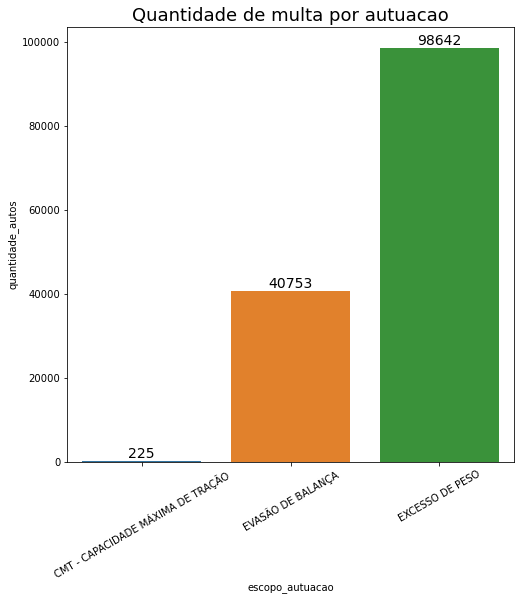

In [141]:
#Criando Dataframe com os dados agrupados
df = df_multas_treated.groupby('escopo_autuacao')['quantidade_autos'].sum().reset_index()

plt.figure(figsize = (8, 8))

ax = sns.barplot(x = 'escopo_autuacao', y = 'quantidade_autos', data = df)

# Anotando valores nos graficos
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), 
                (p.get_x() + 0.4, p.get_height()),
                ha = 'center', 
                va = 'bottom',
                color = 'black',
                size = 14)


# Titulo
plt.title('Quantidade de multa por autuacao', 
          fontsize = 18)

plt.xticks(rotation = 30)


# Exibir
plt.show()

#### Colums 'mes'

In [142]:
# Verificando os valores unicos
df_multas_treated.mes.unique()

array(['JANEIRO', 'FEVEREIRO', 'MARÇO', 'ABRIL', 'MAIO', 'JUNHO', 'JULHO',
       'AGOSTO', 'SETEMBRO', 'OUTUBRO', 'NOVEMBRO', 'DEZEMBRO'],
      dtype=object)

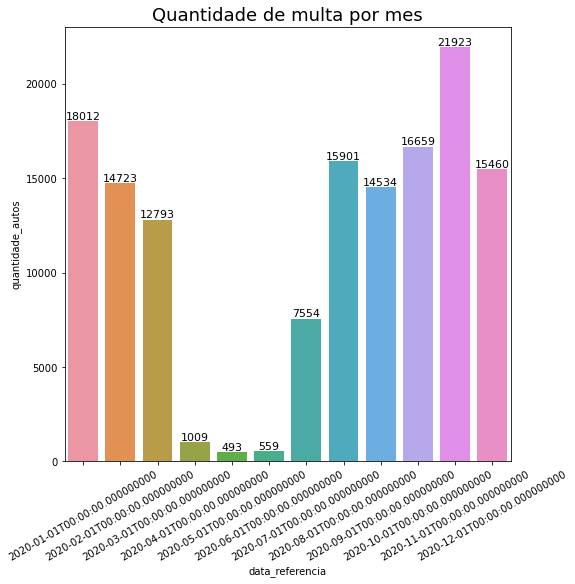

In [143]:
#Criando Dataframe com os dados agrupados
df = df_multas_treated.groupby('data_referencia')['quantidade_autos'].sum().reset_index()

plt.figure(figsize = (8, 8))

ax = sns.barplot(x = 'data_referencia', y = 'quantidade_autos', data = df)

# Anotando valores nos graficos
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), 
                (p.get_x() + 0.4, p.get_height()),
                ha = 'center', 
                va = 'bottom',
                color = 'black',
                size = 11)


# Titulo
plt.title('Quantidade de multa por mes', 
          fontsize = 18)

plt.xticks(rotation = 30)


# Exibir
plt.show()

#### Column 'uf'

In [144]:
# Analisando o dataframe
df_multas_treated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   escopo_autuacao     334 non-null    object        
 1   mes                 334 non-null    object        
 2   uf                  334 non-null    object        
 3   amparo_legal        334 non-null    object        
 4   descricao_infracao  334 non-null    object        
 5   quantidade_autos    334 non-null    int64         
 6   data_referencia     334 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 18.4+ KB


In [145]:
# Verificando os valores unicos
df_multas_treated.uf.unique()

array(['ES', 'MG', 'MS', 'RJ', 'SC', 'BA', 'MT', 'PR', 'RS', 'SP', 'GO'],
      dtype=object)

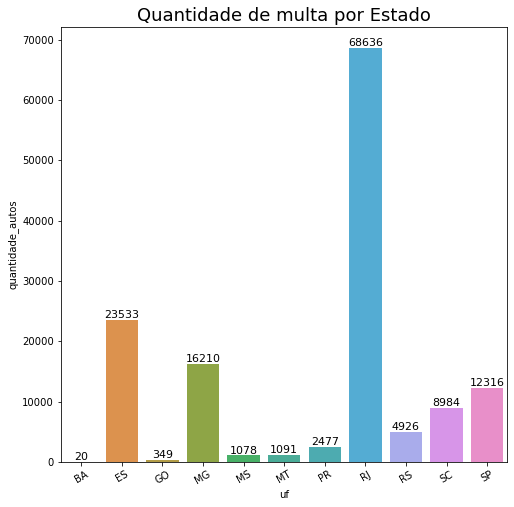

In [146]:
#Criando Dataframe com os dados agrupados
df = df_multas_treated.groupby('uf')['quantidade_autos'].sum().reset_index()

plt.figure(figsize = (8, 8))

ax = sns.barplot(x = 'uf', y = 'quantidade_autos', data = df)

# Anotando valores nos graficos
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), 
                (p.get_x() + 0.4, p.get_height()),
                ha = 'center', 
                va = 'bottom',
                color = 'black',
                size = 11)


# Titulo
plt.title('Quantidade de multa por Estado', 
          fontsize = 18)

plt.xticks(rotation = 30)


# Exibir
plt.show()

#### Column 'amparo_legal'

In [147]:
# Verificando os valores unicos
df_multas_treated.amparo_legal.unique()

array(['LEI 9503/97 LEI 10561/02 RES. CONTRAN Nº 210/06, 211/06 E 258/07 E ALTERAÇÕES PORTARIA DENATRAN 63/09 E 59/07 E ALTERAÇÕES ',
       'LEI 9503 DE 23/09/1997 TRANSPOR, SEM AUTORIZAÇÃO, BLOQUEIO VIÁRIO COM OU SEM SINALIZAÇÃO OU DISPOSITIVOS AUXILIARES, DEIXAR DE ADENTRAR ÀS ÁREAS DESTINADAS À PESAGEM DE VEÍCULOS OU EVADIR-SE PARA NÃO EFETUAR O PAGAMENTO DO PEDÁGIO.',
       '[]'], dtype=object)

In [148]:
# Verificar a quantidade de dados por amparo legal
df_multas_treated.groupby('amparo_legal')['quantidade_autos'].sum().reset_index()

,amparo_legal,quantidade_autos
0,"LEI 9503 DE 23/09/1997 TRANSPOR, SEM AUTORIZAÇ...",40753
1,LEI 9503/97 LEI 10561/02 RES. CONTRAN Nº 210/0...,98865
2,[],2


In [149]:
df_multas_treated[df_multas_treated['amparo_legal'] == '[]']

,escopo_autuacao,mes,uf,amparo_legal,descricao_infracao,quantidade_autos,data_referencia
26,EXCESSO DE PESO,JANEIRO,RJ,[],REALIZAR TRANSPORTE PERMISSIONADO DE PASSAGEIR...,1,2020-01-01
187,EXCESSO DE PESO,AGOSTO,RJ,[],REALIZAR TRANSPORTE PERMISSIONADO DE PASSAGEIR...,1,2020-08-01


Percebe-se que ha uma linha com registros indevidos, diante disso essa linha sera excluida

In [150]:
# Deletando colunas
df_multas_treated = df_multas_treated. \
                        drop(df_multas_treated[(df_multas_treated['amparo_legal'] == '[]')].index)

#### Column 'descricao_infracao'

In [151]:
# Verificando os valores unicos
df_multas_treated.descricao_infracao.unique()

array(['TRANSITAR COM O VEÍCULO EXCEDENDO A CMT ACIMA DE 1000 KG',
       'TRANSITAR COM O VEÍCULO EXCEDENDO A CMT EM ATÉ 600 KG',
       'TRANSITAR COM O VEÍCULO EXCEDENDO A CMT ENTRE 601 E 1000 KG',
       'ART. 209 DEIXAR DE ADENTRAR AS ÁREAS DESTINADAS À PESAGEM DE VEÍCULOS',
       'TRANSITAR COM O VEÍCULO COM EXCESSO DE PESO - PBT/PBTC',
       'TRANSITAR COM O VEÍCULO COM EXCESSO DE PESO - PBT/PBTC E POR EIXO',
       'TRANSITAR COM O VEÍCULO COM EXCESSO DE PESO - POR EIXO'],
      dtype=object)

In [152]:
# Verificar a quantidade de dados por amparo legal
df_multas_treated.groupby('descricao_infracao')['quantidade_autos'].sum().reset_index()

,descricao_infracao,quantidade_autos
0,ART. 209 DEIXAR DE ADENTRAR AS ÁREAS DESTINADA...,40753
1,TRANSITAR COM O VEÍCULO COM EXCESSO DE PESO - ...,8520
2,TRANSITAR COM O VEÍCULO COM EXCESSO DE PESO - ...,12269
3,TRANSITAR COM O VEÍCULO COM EXCESSO DE PESO - ...,77851
4,TRANSITAR COM O VEÍCULO EXCEDENDO A CMT ACIMA ...,130
5,TRANSITAR COM O VEÍCULO EXCEDENDO A CMT EM ATÉ...,75
6,TRANSITAR COM O VEÍCULO EXCEDENDO A CMT ENTRE ...,20


A unica grande incosistencia sao os excessos de espacos em branco em algumas colunas, sendo assim removeremos esses espacos em branco de todas as colunas

In [153]:
df_multas_treated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 0 to 333
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   escopo_autuacao     332 non-null    object        
 1   mes                 332 non-null    object        
 2   uf                  332 non-null    object        
 3   amparo_legal        332 non-null    object        
 4   descricao_infracao  332 non-null    object        
 5   quantidade_autos    332 non-null    int64         
 6   data_referencia     332 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 20.8+ KB


In [154]:
# Removendo valores em branco em excesso
df_multas_treated['escopo_autuacao'] = df_multas_treated['escopo_autuacao'].apply(lambda x: x.strip())
df_multas_treated['amparo_legal'] = df_multas_treated['amparo_legal'].apply(lambda x: x.strip())
df_multas_treated['descricao_infracao'] = df_multas_treated['descricao_infracao'].apply(lambda x: x.strip())

#### Column 'quantidade_autos'

In [155]:
df_multas_treated.quantidade_autos.describe()

count     332.000000
mean      420.536145
std       912.180368
min         1.000000
25%         6.000000
50%        93.500000
75%       362.000000
max      8413.000000
Name: quantidade_autos, dtype: float64

In [156]:
# Nao foram encontradas maiores divergencias, sendo assim podemos importar os dados para um arquivo csv
df_multas_treated.head(6)

,escopo_autuacao,mes,uf,amparo_legal,descricao_infracao,quantidade_autos,data_referencia
0,CMT - CAPACIDADE MÁXIMA DE TRAÇÃO,JANEIRO,ES,LEI 9503/97 LEI 10561/02 RES. CONTRAN Nº 210/0...,TRANSITAR COM O VEÍCULO EXCEDENDO A CMT ACIMA ...,1,2020-01-01
1,CMT - CAPACIDADE MÁXIMA DE TRAÇÃO,JANEIRO,MG,LEI 9503/97 LEI 10561/02 RES. CONTRAN Nº 210/0...,TRANSITAR COM O VEÍCULO EXCEDENDO A CMT EM ATÉ...,2,2020-01-01
2,CMT - CAPACIDADE MÁXIMA DE TRAÇÃO,JANEIRO,MG,LEI 9503/97 LEI 10561/02 RES. CONTRAN Nº 210/0...,TRANSITAR COM O VEÍCULO EXCEDENDO A CMT ACIMA ...,3,2020-01-01
3,CMT - CAPACIDADE MÁXIMA DE TRAÇÃO,JANEIRO,MS,LEI 9503/97 LEI 10561/02 RES. CONTRAN Nº 210/0...,TRANSITAR COM O VEÍCULO EXCEDENDO A CMT ACIMA ...,2,2020-01-01
4,CMT - CAPACIDADE MÁXIMA DE TRAÇÃO,JANEIRO,RJ,LEI 9503/97 LEI 10561/02 RES. CONTRAN Nº 210/0...,TRANSITAR COM O VEÍCULO EXCEDENDO A CMT ENTRE ...,8,2020-01-01
5,CMT - CAPACIDADE MÁXIMA DE TRAÇÃO,JANEIRO,RJ,LEI 9503/97 LEI 10561/02 RES. CONTRAN Nº 210/0...,TRANSITAR COM O VEÍCULO EXCEDENDO A CMT ACIMA ...,9,2020-01-01


### Gerando dados

<p>OS tramentos e analises foram feitos, sendo assim resta apenas gerar um novo dataset com os dados ja tratados</p>

In [157]:
df_multas_treated.to_csv('datasets/multas.csv', index = False)